### Part V. Support Vector Machine Learning
In Part V, you will experiment with Support Vector Machine (SVM) learning. 

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

0. For this experiment, you will be utilizing the toydata.csv used in Part I. This toy dataset contains two numeric features (‘Feature1’, ‘Feature2’) and one binary class feature (‘Label’), denoted by 0 and 1.

1. Data Preparation

1. (a) Load the dataset


In [2]:
data = pd.read_csv("toydata.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  100 non-null    float64
 1   Feature2  100 non-null    float64
 2   Label     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


1. (b) Partition the data using the holdout method, allocating 20% of testing, and the remaining 80% for training.

In [4]:
y = data["Label"]
X = data.drop(columns=["Label"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

2. SVM Models:

2. (c) Construct four Support Vector Machine (SVM) models, each employing different kernel types:
- linear
- poly
- rbf
- sigmoid.

In [7]:
svc_linear = SVC(kernel="linear")
svc_poly = SVC(kernel="poly")
svc_rbf = SVC(kernel="rbf")
svc_sigmoid = SVC(kernel="sigmoid")

svc_linear =svc_linear.fit(X_train, y_train)
svc_poly = svc_poly.fit(X_train, y_train)
svc_rbf =svc_rbf.fit(X_train, y_train)
svc_sigmoid =svc_sigmoid.fit(X_train, y_train)


2. (d) Assess the models using the test data

In [11]:
print("\t\tMetrics for SVC with Linear Kernel")
print("-"*65)
y_pred = svc_linear.predict(X_test)
print(classification_report(y_test, y_pred))

		Metrics for SVC with Linear Kernel
-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [12]:
print("\t\tMetrics for SVC with Poly Kernel")
print("-"*65)
y_pred = svc_poly.predict(X_test)
print(classification_report(y_test, y_pred))

		Metrics for SVC with Poly Kernel
-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [13]:
print("\t\tMetrics for SVC with RBF Kernel")
print("-"*65)
y_pred = svc_rbf.predict(X_test)
print(classification_report(y_test, y_pred))

		Metrics for SVC with RBF Kernel
-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [14]:
print("\t\tMetrics for SVC with Sigmoid Kernel")
print("-"*65)
y_pred = svc_sigmoid.predict(X_test)
print(classification_report(y_test, y_pred))

		Metrics for SVC with Sigmoid Kernel
-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



As there are only 20 samples and all the classifiers are predicting all 20 test samples correctly all of them have perfect metrics.

3. Model Evaluation and Visualization

3. (e) Calculate the accuracy of each SVM model

In [17]:
print("Accuracy of SVC with Linear Kernel: "+str(accuracy_score(svc_linear.predict(X_test), y_test)*100))
print("Accuracy of SVC with Poly Kernel: "+str(accuracy_score(svc_poly.predict(X_test), y_test)*100))
print("Accuracy of SVC with RBF Kernel: "+str(accuracy_score(svc_rbf.predict(X_test), y_test)*100))
print("Accuracy of SVC with sigmoid Kernel: "+str(accuracy_score(svc_sigmoid.predict(X_test), y_test)*100))

Accuracy of SVC with Linear Kernel: 100.0
Accuracy of SVC with Poly Kernel: 100.0
Accuracy of SVC with RBF Kernel: 100.0
Accuracy of SVC with sigmoid Kernel: 100.0


3. (f) Per each SVM model, generate a scatter plot to visualize the data points in the feature space, coloring them by their true labels. Integrate a contour plot to visualize the decision boundary and margins of each model. 

In [19]:
def plot_svm_decision_boundary(clf, X, y, kernel):
    h = .02  
    x_min, x_max = X['Feature1'].min() - 1, X['Feature1'].max() + 1
    y_min, y_max = X['Feature2'].min() - 1, X['Feature2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    
    plt.scatter(X['Feature1'], X['Feature2'], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    
    plt.title(f"SVM with {kernel} Kernel")
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.show()


c:\Users\Sanju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


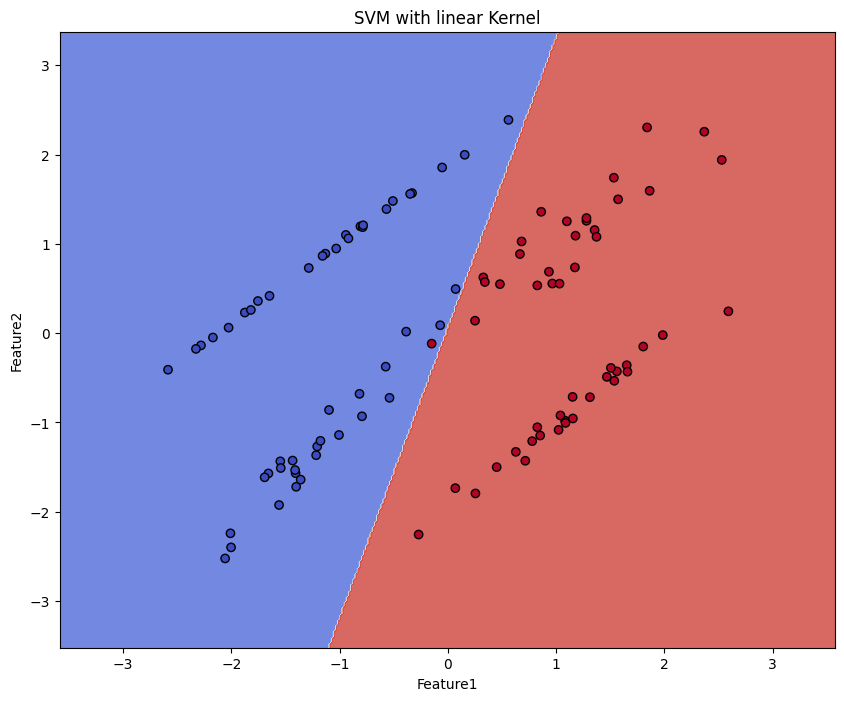

In [20]:
plot_svm_decision_boundary(svc_linear, X, y, "linear")

c:\Users\Sanju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


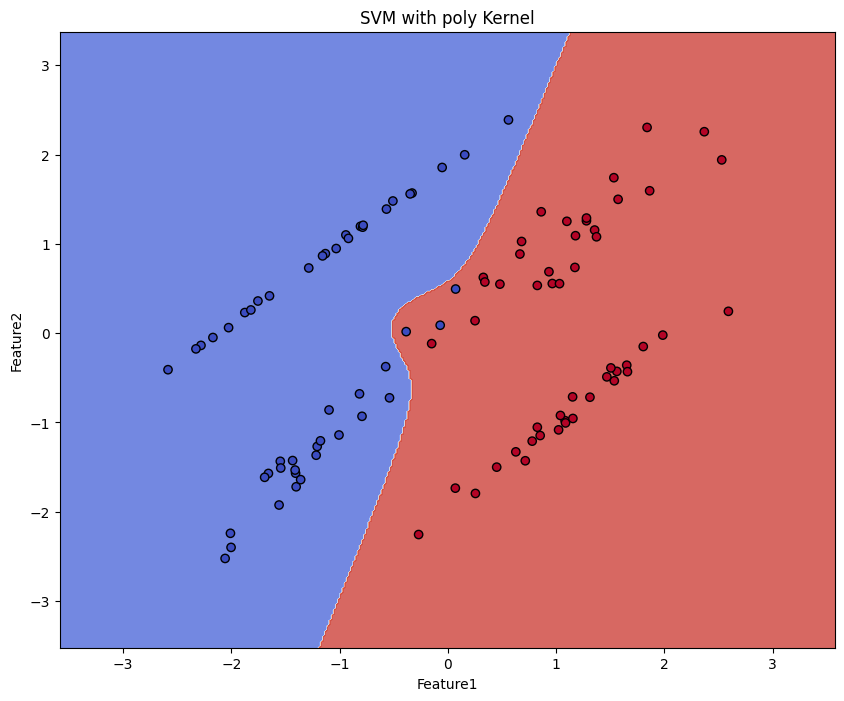

In [21]:
plot_svm_decision_boundary(svc_poly, X, y, "poly")

c:\Users\Sanju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


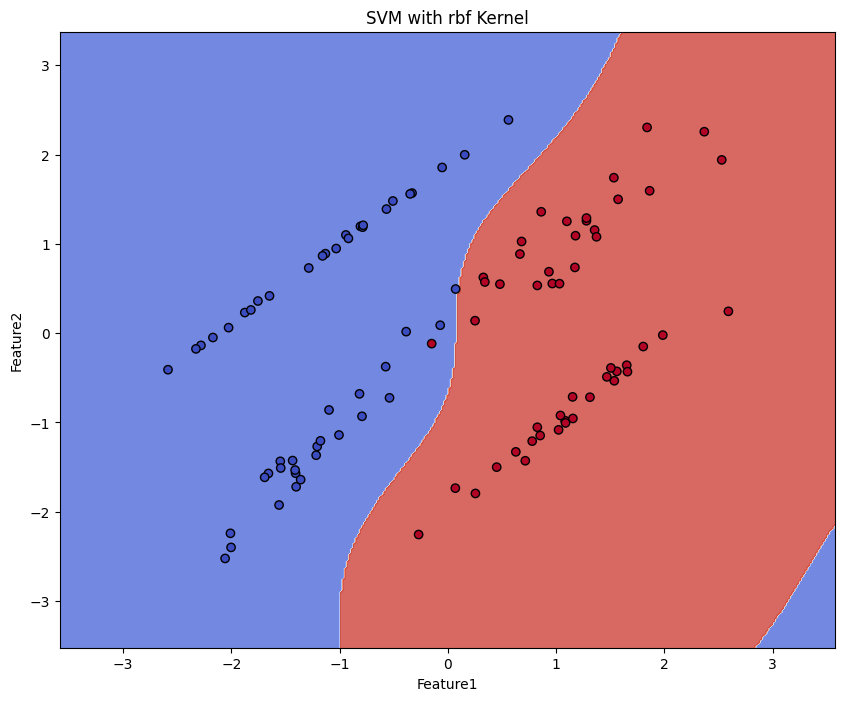

In [22]:
plot_svm_decision_boundary(svc_rbf, X, y, "rbf")

c:\Users\Sanju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


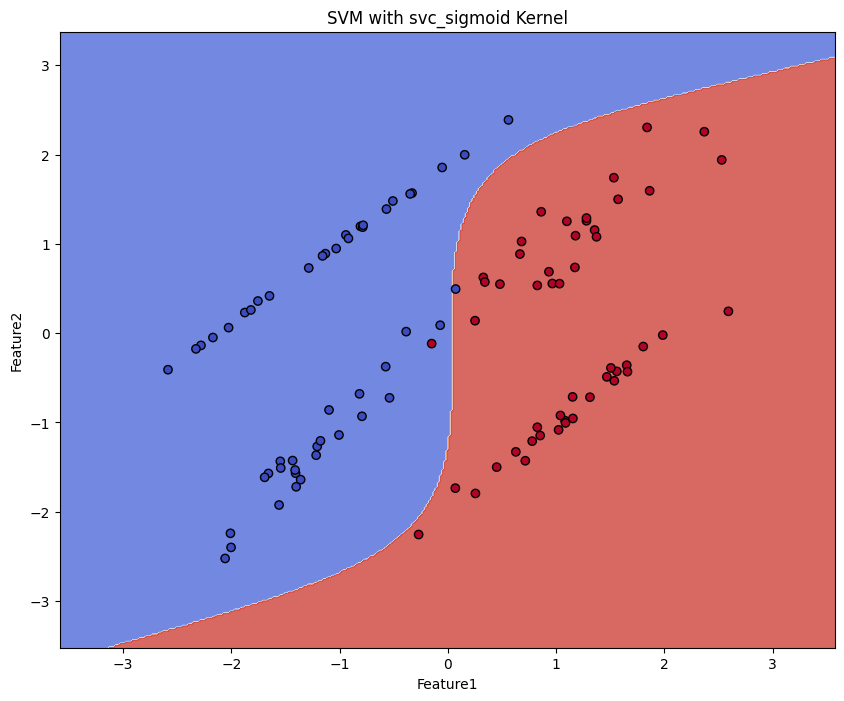

In [23]:
plot_svm_decision_boundary(svc_sigmoid, X, y, "svc_sigmoid")